In [4]:

import requests
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual API key
api_key = '7c17a88e84044c12d66273dfaed7fa39fc15b39d'

# Define the API endpoint you want to query
endpoint = 'https://api.census.gov/data/2019/abscs?get=NAME,GEO_ID,RCPSZFI,NAICS2017_LABEL,ETH_GROUP,SEX,EMPSZFI,EMP,FIRMPDEMP&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:33100&NAICS2017=00'


# Define the parameters for your query

# Send the request to the API and store the response
response = requests.get(endpoint)

# Convert the response into a pandas DataFrame
df = pd.DataFrame.from_records(response.json()[1:], columns=response.json()[0])

# Save the DataFrame to a CSV file
df.to_csv('../assessment_8/data/census_data_miami.csv', index=False)


In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [3]:

census_miami = pd.read_csv('../assessment_8/data/census_data_miami.csv')
census_miami


,NAME,GEO_ID,RCPSZFI,NAICS2017_LABEL,ETH_GROUP,SEX,EMPSZFI,EMP,FIRMPDEMP,NAICS2017,metropolitan statistical area/micropolitan statistical area
0,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total for all sectors,1,1,1,2232129,171832,0,33100
1,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total for all sectors,1,1,611,0,26336,0,33100
2,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total for all sectors,1,1,612,173439,96922,0,33100
3,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total for all sectors,1,1,620,136328,20777,0,33100
4,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total for all sectors,1,1,630,160530,12216,0,33100
...,...,...,...,...,...,...,...,...,...,...,...
137,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,531,Total for all sectors,29,1,1,87213,18695,0,33100
138,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,532,Total for all sectors,29,1,1,708822,28908,0,33100
139,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total for all sectors,29,2,1,150218,26181,0,33100
140,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total for all sectors,29,3,1,655596,72581,0,33100


In [4]:
one = census_miami.rename(columns={'NAME':'Municipality', 'RCPSZFI': 'Firm_Sale_Amount', 'ETH_GROUP' : 'Ethnicity', 'SEX': 'Gender',
                             'EMPSZFI': 'Firm_Employee_Size', 'EMP': 'Employee_Amount', 'FIRMPDEMP': 'Amount_of_Firms'})

two = one.drop(['NAICS2017_LABEL', 'NAICS2017', 'metropolitan statistical area/micropolitan statistical area', 'Firm_Employee_Size'], axis=1)
two

,Municipality,GEO_ID,Firm_Sale_Amount,Ethnicity,Gender,Employee_Amount,Amount_of_Firms
0,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,1,1,2232129,171832
1,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,1,1,0,26336
2,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,1,1,173439,96922
3,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,1,1,136328,20777
4,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,1,1,160530,12216
...,...,...,...,...,...,...,...
137,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,531,29,1,87213,18695
138,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,532,29,1,708822,28908
139,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,29,2,150218,26181
140,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,29,3,655596,72581


In [5]:
new = two.loc[:,'Firm_Sale_Amount'] = two['Firm_Sale_Amount'].astype(str).replace({'511': 'Less than $5,000', '518': '$5,000,$9,000', '531': '$500,000-$999,999', '519' : ' $10,000-$24,999', '521': '$25,000-$49,999', '522' : '$50,000-$99,999', '523': '$100,000-$249,999',
'525': '$250,000 to $499,999', '532': ' $1,000,000 or more' })

In [6]:
three = (two
    .replace({'Gender':{1: 'Total'}})
    .replace({'Gender':{2: 'Female'}})
    .replace({'Gender':{3: 'Male'}})
    .replace({'Gender':{4: 'Equally male/female'}})
    .replace({'Gender':{96: 'Classified'}})
    .replace({'Gender':{98: 'Unclassificable'}})
    .replace({'Ethnicity':{ 1 : 'Total'}})
    .replace({'Ethnicity':{20: 'Hispanic'}})
    .replace({'Ethnicity':{28: 'Equally Hispanic/non-Hispanic'}})
    .replace({'Ethnicity':{29: 'Non-Hispanic'}})
    .replace({'Ethnicity':{96: 'Classifiable'}})
    .replace({'Ethnicity':{98: 'Unclassifiable'}})
)


In [7]:
three

,Municipality,GEO_ID,Firm_Sale_Amount,Ethnicity,Gender,Employee_Amount,Amount_of_Firms
0,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total,Total,2232129,171832
1,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total,Total,0,26336
2,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total,Total,173439,96922
3,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total,Total,136328,20777
4,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Total,Total,160530,12216
...,...,...,...,...,...,...,...
137,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$500,000-$999,999",Non-Hispanic,Total,87213,18695
138,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$1,000,000 or more",Non-Hispanic,Total,708822,28908
139,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Non-Hispanic,Female,150218,26181
140,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,1,Non-Hispanic,Male,655596,72581


In [8]:
final_miami = three.drop(three[three['Firm_Sale_Amount'] == '1'].index)


In [9]:
final_miami

,Municipality,GEO_ID,Firm_Sale_Amount,Ethnicity,Gender,Employee_Amount,Amount_of_Firms
10,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"Less than $5,000",Total,Total,2152,1233
11,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$5,000,$9,000",Total,Total,527,1115
12,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$10,000-$24,999",Total,Total,10489,4375
13,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$25,000-$49,999",Total,Total,10405,8950
14,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$50,000-$99,999",Total,Total,18500,17632
...,...,...,...,...,...,...,...
134,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$50,000-$99,999",Non-Hispanic,Total,11835,11540
135,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$100,000-$249,999",Non-Hispanic,Total,33058,23576
136,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$250,000 to $499,999",Non-Hispanic,Total,53505,21312
137,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$500,000-$999,999",Non-Hispanic,Total,87213,18695


In [10]:
final_miami['State'] = pd.Series(['Florida']*139)
pd.options.display.max_rows = 999
final_miami

,Municipality,GEO_ID,Firm_Sale_Amount,Ethnicity,Gender,Employee_Amount,Amount_of_Firms,State
10,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"Less than $5,000",Total,Total,2152,1233,Florida
11,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$5,000,$9,000",Total,Total,527,1115,Florida
12,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$10,000-$24,999",Total,Total,10489,4375,Florida
13,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$25,000-$49,999",Total,Total,10405,8950,Florida
14,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$50,000-$99,999",Total,Total,18500,17632,Florida
15,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$100,000-$249,999",Total,Total,51501,35846,Florida
16,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$250,000 to $499,999",Total,Total,79973,31088,Florida
17,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$500,000-$999,999",Total,Total,131663,27422,Florida
18,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"$1,000,000 or more",Total,Total,1926920,44173,Florida
29,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,"Less than $5,000",Total,Female,0,0,Florida


In [28]:
final_miami.to_csv('../assessment_8/data/census_data_cleaned_miami.csv', index=False)

In [16]:

fig = px.bar(final_miami, y='Amount_of_Firms', x='Firm_Sale_Amount')
fig.update_layout(
    xaxis_title="Firm Sale Amount",
    yaxis_title="Amount of Firms"
)
fig.update_layout(title="Firm Sale's vs Total Firms in Miami")
fig.show()


In [ ]:
final_miami.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 10 to 138
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Municipality      63 non-null     object
 1   GEO_ID            63 non-null     object
 2   Firm_Sale_Amount  63 non-null     object
 3   Ethnicity         63 non-null     object
 4   Gender            63 non-null     object
 5   Employee_Amount   63 non-null     int64 
 6   Amount_of_Firms   63 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 3.9+ KB


In [ ]:
grouped_gender= final_miami.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_gender

Ethnicity
Equally Hispanic/non-Hispanic      235.666667
Hispanic                          5325.333333
Non-Hispanic                     12749.777778
Total                             9383.472222
Name: Amount_of_Firms, dtype: float64

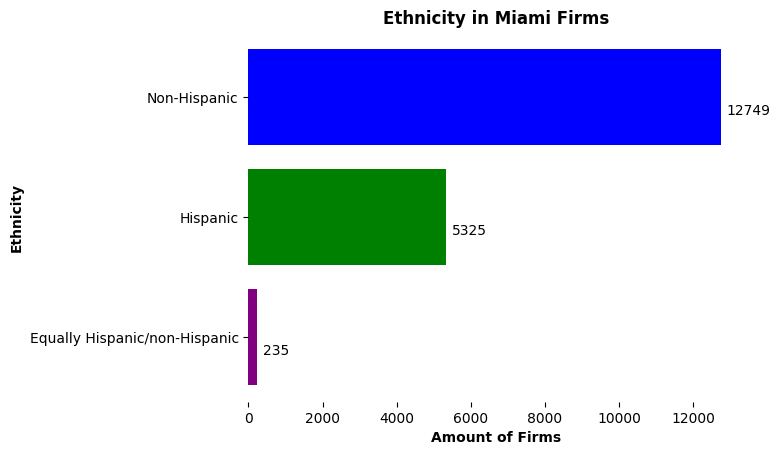

In [22]:
data = {
    'Ethnicity': ['Equally Hispanic/non-Hispanic', 'Hispanic', 'Non-Hispanic'],
    'Amount_of_Firms': [235, 5325, 12749]
}

df = pd.DataFrame(data)
fig, ax = plt.subplots()
bars = ax.barh(df['Ethnicity'], df['Amount_of_Firms'], color=['purple', 'green', 'blue'])
for i, v in enumerate(df['Amount_of_Firms']):
    ax.text(v + 159, i - 0.15, str(v), color='black')
ax.set_xlabel('Amount of Firms', fontweight = 'bold')
ax.set_ylabel('Ethnicity', fontweight='bold')
ax.set_title('Ethnicity in Miami Firms', fontweight='bold')
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

